# Inference


/Users/adamsadiq/Downloads/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


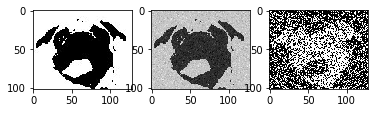

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imread

def add_gaussian_noise(im,prop,varSigma):
    N = int(np.round(np.prod(im.shape)*prop))
    
    index = np.unravel_index(np.random.permutation(np.prod(im.shape))[1:N],im.shape)
    e = varSigma*np.random.randn(np.prod(im.shape)).reshape(im.shape)
    im2 = np.copy(im).astype('float')
    im2[index] +=e[index]
    
    return im2


def add_saltnpeppar_noise(im,prop):
    N = int(np.round(np.prod(im.shape)*prop))
    index = np.unravel_index(np.random.permutation(np.prod(im.shape))[1:N],im.shape)
    im2 = np.copy(im)
    im2[index] = 1 - im2[index]
    
    return im2




prop = 0.7
varSigma = 0.1
im = imread('pug-done.jpg')
im = im/255
height = im.shape[0] 
width = im.shape[1]
fig = plt.figure()
ax = fig.add_subplot(131)
ax.imshow(im,cmap="gray")

imG = add_gaussian_noise(im,prop,varSigma)
axG = fig.add_subplot(132)
axG.imshow(imG,cmap="gray")

imSP = add_saltnpeppar_noise(im,prop)
axSP = fig.add_subplot(133)
axSP.imshow(imSP,cmap="gray")

plt.show()

In [3]:
def neighbours(i,j,M,N,size =8):
    if size ==4:
        if( i==0 and j ==0):
            n = [(0,1),(1,0)]
        elif i==0 and j == N-1:
            n == [(0,N-2),(1,N-1)]
        elif i == M-1 and j ==0:
            n = [(M-1,1),(M-2,0)]
        elif i == M-1 and j ==N-1:
            n = [(M-1,N-2),(M-2,N-1)]
        elif i == 0:
            n = [(0,j-1), (0,j+1),(1,j)]
        elif i ==M-1:
            n = [(M-1,j-1),(M-1,j+1),(M-2,j)]
        elif j == 0:
            n = [(i-1,0),(i+1,0),(i,1)]
        elif j == N-1:
            n = [(i-1,N-1),(i+1,N-1),(i,N-2)]
        else:
            n = [(i-1,j),(i+1,j),(i,j-1), (i,j+1)]
        return n
    if size ==8:
        if( i==0 and j ==0):
            n = [(0,1),(1,0),(1,1)]
        elif i==0 and j == N-1:
            n = [(0,N-2),(1,N-1),(1,N-2)]
        elif i == M-1 and j ==0:
            n = [(M-1,1),(M-2,0),(M-2,1)]
        elif i == M-1 and j ==N-1:
            n = [(M-1,N-2),(M-2,N-1),(M-2,N-2)]
        elif i == 0:
            n = [(0,j-1), (0,j+1),(1,j),(1,j-1),(1,j+1)]
        elif i ==M-1:
            n = [(M-1,j-1),(M-1,j+1),(M-2,j),(M-2,j-1),(M-2,j+1)]
        elif j == 0:
            n = [(i-1,0),(i+1,0),(i,1),(i-1,1),(i+1,1)]
        elif j == N-1:
            n = [(i-1,N-1),(i+1,N-1),(i,N-2),(i-1,N-2),(i+1,N-2)]
        else:
            n = [(i-1,j),(i+1,j),(i,j-1), (i,j+1),(i-1,j-1),(i-1,j+1),(i+1,j-1),(i+1,j+1)]
       
        return n

    
    
                

## Question 1

/Users/adamsadiq/Downloads/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


0


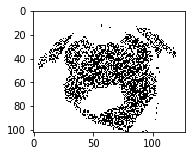

In [4]:

def kronecker(a,b):
#     print(a,b)
    if (b > 0):
        b = 1 
    else: 
        b = -1
   
    if (a == b):
        return 1
    return -1
    
def energy(x,im,indices,val,curpixel,alpha,beta):
    energy = 0
#   h = 0 simply means that the prior probabillities of the two states (black or white) are equal
    h = 0
#     calculates the energy of a given value for a pixel
    for i in range(len(indices)):
#         energy += h*x[indices[i]] -beta*val*x[indices[i]]*x[curpixel]- n*x[indices[i]]*im[indices[i]]
          energy += alpha*(1-kronecker(val,im[curpixel])) + beta*(1-kronecker(val,x[indices[i]]))                                                           
    return energy
# test count
# firstpxindices = neighbours(0,0,im2.shape[0],im2.shape[1])
# print(neighboursCount(im2,firstpxindices,1))
        
def ICM(im,tau):

    x = im

    
    for t in range(tau):
        print(t)
        for i in range(0,height):
            for j in range(0,width):
                a = energy(x,im,neighbours(i,j,height,width),1,(i,j),2,1)
                b = energy(x,im,neighbours(i,j,height,width),-1,(i,j),2,1)
                if ( a < b ):
                    x[(i,j)] = 1
                else:
                    x[(i,j)] = -1
    
    return x

prop = 0.4
varSigma = 0.2
im = imread('pug-done.jpg')
im = im/255

fig1 = plt.figure()
# ax4 = fig1.add_subplot(131)
# ax4.imshow(im,cmap="gray")

# im2 = add_gaussian_noise(im,prop,varSigma)
# ax5 = fig1.add_subplot(121)
# ax5.imshow(im2,cmap="gray")

im3 = ICM(imG,1)

ax6 = fig1.add_subplot(122)
ax6.imshow(im3,cmap="gray")

plt.show()

## Question 2

/Users/adamsadiq/Downloads/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


0


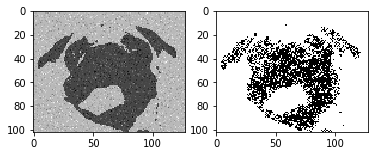

In [5]:
def gibbsSampling(im,tau):

    x = im    
 
    
    for t in range(tau):
        print(t)
        for i in range(0,height):
            for j in range(0,width):
                
                z = np.random.uniform(0, 1)
                a = energy(x,im,neighbours(i,j,height,width),1,(i,j),2,1)
                b = energy(x,im,neighbours(i,j,height,width),-1,(i,j),2,1)
                
                p = a / (a+b)
                
                if ( z > p ):
                    x[(i,j)] = 1
                else:
                    x[(i,j)] = -1

       
            
    
    
    return x

prop = 0.4


varSigma = 0.2
im = imread('pug-done.jpg')
im = im/255

fig2 = plt.figure()
# ax7 = fig2.add_subplot(131)
# ax7.imshow(im,cmap="gray")

im2 = add_gaussian_noise(im,prop,varSigma)
ax8 = fig2.add_subplot(121)
ax8.imshow(im2,cmap="gray")
# print(im)



im3 = gibbsSampling(im2,1)
ax9 = fig2.add_subplot(122)
ax9.imshow(im2,cmap="gray")


plt.show()



## Question 3

/Users/adamsadiq/Downloads/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


0
0
1
2
3
4
0
1
2
3
4
5
6
7
8
9


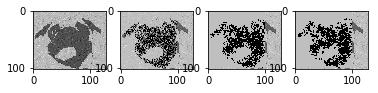

In [11]:
np.random.seed(20)
def gibbsAltered(im,tau):

    x = im   
 
    
    for t in range(tau):
        print(t)
        for i_ in range(0,height):
            for j_ in range(0,width):
                r = np.random.rand(200) * 100
                i = r[i_]
                np.random.shuffle(r)
                j = r[i_]
                i = int(i)
                j = int(j)
            
            
                distribution = np.random.uniform(0,1)
#                 i = int(arr1[i])
#                 j = int(arr2[j])
                
#                 print(i,j)
                if(distribution > 0.3):
                    z = np.random.uniform(0, 1)
                    a = energy(x,im,neighbours(i,j,height,width),1,(i,j),2,1)
                    b = energy(x,im,neighbours(i,j,height,width),-1,(i,j),2,1)

                    p = a / (a+b)

                    if ( z > p ):
                        x[(i,j)] = 1
                    else:
                        x[(i,j)] = -1  
    return x

prop = 0.4


varSigma = 0.2
im = imread('pug-done.jpg')
im = im/255

fig2 = plt.figure()
# ax7 = fig2.add_subplot(131)
# ax7.imshow(im,cmap="gray")

im2 = add_gaussian_noise(im,prop,varSigma)
ax8 = fig2.add_subplot(141)
ax8.imshow(im2,cmap="gray")
# print(im)

im5 = gibbsAltered(im2,1)
ax9 = fig2.add_subplot(142)
ax9.imshow(im2,cmap="gray")

im3 = gibbsAltered(im2,5)
ax9 = fig2.add_subplot(143)
ax9.imshow(im2,cmap="gray")

im4 = gibbsAltered(im2,10)
ax9 = fig2.add_subplot(144)
ax9.imshow(im2,cmap="gray")

plt.show()



## Question 4

/Users/adamsadiq/Downloads/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


0
0
1
2
3
4
0
1
2
3
4
5
6
7
8
9


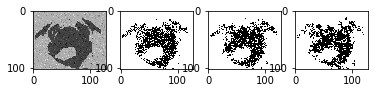

In [9]:
prop = 0.4

varSigma = 0.2
im = imread('pug-done.jpg')
im = im/255

fig5 = plt.figure()
# ax7 = fig2.add_subplot(131)
# ax7.imshow(im,cmap="gray")

im2 = add_gaussian_noise(im,prop,varSigma)
ax10 = fig5.add_subplot(141)
ax10.imshow(im2,cmap="gray")
# print(im)


im4 = gibbsSampling(im2,1)
ax10 = fig5.add_subplot(142)
ax10.imshow(im2,cmap="gray")

im3 = gibbsSampling(im2,5)
ax10 = fig5.add_subplot(143)
ax10.imshow(im2,cmap="gray")

im5 = gibbsSampling(im2,10)
ax10 = fig5.add_subplot(144)
ax10.imshow(im2,cmap="gray")

plt.show()


## Question 6